In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from PIL import Image
import os
os.chdir('C:\\Users\\Lenovo\\Downloads\\archive')
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout, Input

In [2]:
data = []
labels = []
classes = 43
current_path = os.getcwd()

In [3]:
 for i in range(classes):
    path = os.path.join(current_path,'train', str(i))
    images= os.listdir(path)
    for a in images:
         try:
             image= Image.open(path+'\\'+ a)
             image = image.resize((30,30))
             image = np.array(image)
             data.append(image)
             labels.append(i)
         except Expcetion as e:
             print(e)
     

In [4]:
data = np.array(data)
labels = np.array(labels)

In [5]:
np.save('./training/data',data)
np.save('./training/labels', labels)

In [6]:
data =np.load('./training/data.npy')
labels =np.load('./training/labels.npy')

In [7]:
print(data.shape, labels.shape)

(39209, 30, 30, 3) (39209,)


In [8]:
x_train, x_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state = 0)

In [9]:
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(31367, 30, 30, 3) (7842, 30, 30, 3) (31367,) (7842,)


In [10]:
y_train = to_categorical(y_train, 43)
y_test = to_categorical(y_test, 43)

In [11]:
model = Sequential()
model.add(Input(shape=x_train.shape[1:]))
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(rate=0.25))
model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(43, activation='softmax'))

                 

In [12]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [13]:
epochs=25
history= model.fit(x_train, y_train, batch_size=32, epochs=epochs, validation_data=(x_test,y_test))

Epoch 1/25
981/981 ━━━━━━━━━━━━━━━━━━━━ 20s 19ms/step - accuracy: 0.2818 - loss: 3.6815 - val_accuracy: 0.8312 - val_loss: 0.6372
Epoch 2/25
981/981 ━━━━━━━━━━━━━━━━━━━━ 18s 18ms/step - accuracy: 0.7030 - loss: 0.9915 - val_accuracy: 0.9061 - val_loss: 0.3655
Epoch 3/25
981/981 ━━━━━━━━━━━━━━━━━━━━ 20s 21ms/step - accuracy: 0.7872 - loss: 0.6914 - val_accuracy: 0.9110 - val_loss: 0.3124
Epoch 4/25
981/981 ━━━━━━━━━━━━━━━━━━━━ 20s 21ms/step - accuracy: 0.8185 - loss: 0.5917 - val_accuracy: 0.9258 - val_loss: 0.2466
Epoch 5/25
981/981 ━━━━━━━━━━━━━━━━━━━━ 19s 20ms/step - accuracy: 0.8364 - loss: 0.5370 - val_accuracy: 0.9444 - val_loss: 0.2054
Epoch 6/25
981/981 ━━━━━━━━━━━━━━━━━━━━ 20s 20ms/step - accuracy: 0.8664 - loss: 0.4472 - val_accuracy: 0.9472 - val_loss: 0.1996
Epoch 7/25
981/981 ━━━━━━━━━━━━━━━━━━━━ 19s 20ms/step - accuracy: 0.8706 - loss: 0.4307 - val_accuracy: 0.9603 - val_loss: 0.1529
Epoch 8/25
981/981 ━━━━━━━━━━━━━━━━━━━━ 24s 25ms/step - accuracy: 0.8871 - loss: 0.3698 - 

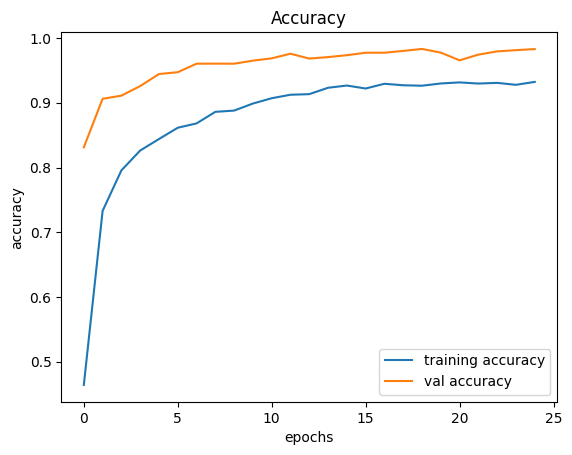

In [14]:
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

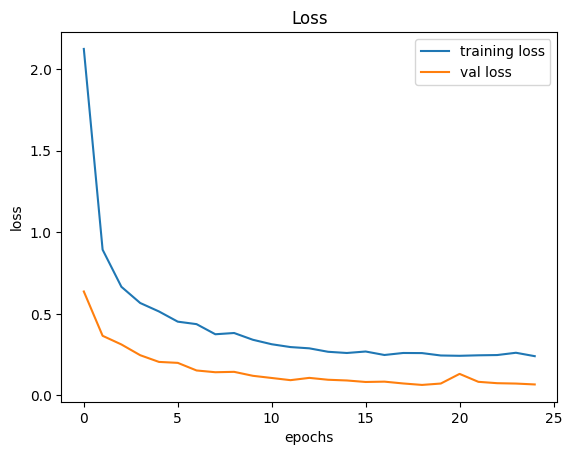

In [15]:
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [16]:
def testing(testcsv):
    y_test = pd.read_csv(testcsv)
    label = y_test["ClassId"].values
    imgs = y_test["Path"].values
    data=[]
    for img in imgs:
        image = Image.open(img)
        image = image.resize((30,30))
        data.append(np.array(image))
    X_test=np.array(data)
    return X_test,label

In [17]:
x_test, label = testing('Test.csv')

In [18]:
Y_pred = model.predict(x_test)
Y_pred

395/395 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step


array([[6.2470797e-25, 2.3874026e-13, 3.6556410e-17, ..., 9.7801389e-15,
        3.5391046e-12, 3.1835887e-22],
       [1.6447498e-08, 9.9997461e-01, 1.3815250e-08, ..., 2.2045427e-17,
        1.9792230e-34, 2.1871225e-22],
       [8.9938979e-27, 4.4002676e-25, 5.7409328e-26, ..., 1.8668518e-28,
        0.0000000e+00, 0.0000000e+00],
       ...,
       [1.9665934e-04, 7.4328579e-02, 3.3348627e-02, ..., 6.8285635e-06,
        2.3094399e-04, 4.1235979e-03],
       [3.7947551e-10, 1.2634496e-06, 1.8469962e-06, ..., 3.1432468e-09,
        1.7689524e-20, 8.4301549e-13],
       [1.3308911e-10, 5.8167487e-08, 4.5090706e-05, ..., 4.0120693e-10,
        2.5094172e-16, 4.3730612e-08]], dtype=float32)

In [19]:
print("Shape of label:", label.shape)
print("Shape of Y_pred:", Y_pred.shape)

Shape of label: (12630,)
Shape of Y_pred: (12630, 43)


In [20]:
model.save("./training/TrafficSignRecognitionBroken2!.keras")

In [21]:
import tk
import random
import threading
import webbrowser
from PIL import Image
from flask import Flask, render_template_string

In [22]:
try:
    import PIL
    tkinter_available = True
except ImportError:
    tkinter_available = False

if tkinter_available:
    print("Tkinter is available.")
else:
    print("Tkinter is not available.")

Tkinter is available.


In [23]:
import os
os.chdir(r'C:\\Users\\Lenovo\\Downloads\\archive')
from keras.models import load_model
model = load_model('./training/TrafficSignRecognitionBroken.keras')

In [24]:
classes = { 
    0: 'Ограничение на скоростта (20km/h)',
    1: 'Ограничение на скоростта (30km/h)', 
    2: 'Ограничение на скоростта (50km/h)', 
    3: 'Ограничение на скоростта (60km/h)', 
    4: 'Ограничение на скоростта (70km/h)', 
    5: 'Ограничение на скоростта (80km/h)', 
    6: 'Край на ограничението на скоростта (80km/h)', 
    7: 'Ограничение на скоростта (100km/h)', 
    8: 'Ограничение на скоростта (120km/h)', 
    9: 'Забранено изпреварването', 
    10: 'Забранено изпреварването за МПС над 3.5 тона', 
    11: 'Предимство на кръстовище', 
    12: 'Главен път', 
    13: 'Пропусни движението', 
    14: 'Стоп', 
    15: 'Забранен вход за всички видове превозни средства', 
    16: 'Забранено за МПС над 3.5 тона', 
    17: 'Забранен вход', 
    18: 'Общо предупреждение', 
    19: 'Опасен завой наляво', 
    20: 'Опасен завой надясно', 
    21: 'Поредица от опасни завои', 
    22: 'Неравен път', 
    23: 'Хлъзгав път', 
    24: 'Пътят се стеснява отдясно', 
    25: 'Път в ремонт', 
    26: 'Светофар', 
    27: 'Внимание: Пешеходци!', 
    28: 'Деца на пътя', 
    29: 'Път за велосипедисти', 
    30: 'Внимание: лед/сняг', 
    31: 'Диви животни на пътя', 
    32: 'Край на ограниченията на скоростта и изпреварването', 
    33: 'Задължително надясно', 
    34: 'Завой наляво напред', 
    35: 'Само направо', 
    36: 'Само направо или надясно', 
    37: 'Само направо или наляво', 
    38: 'Движение вдясно', 
    39: 'Движение вляво', 
    40: 'Задължителен кръгово движение', 
    41: 'Край на забраната за изпреварване', 
    42: 'Край на забраната за изпреварване за МПС над 3.5 тона' 
}

In [25]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
def test_on_img(img):
    data=[]
    image = Image.open(img)
    image = image.resize((30,30))
    data.append(np.array(image))
    X_test=np.array(data)
    Y_pred = model.predict(X_test)
    return image,Y_pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


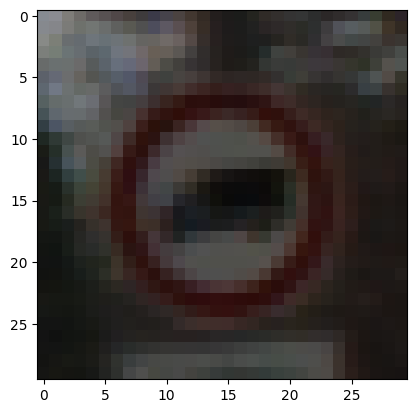

In [26]:
plot,prediction = test_on_img(r'C:\Users\Lenovo\Downloads\archive\Test\00059.png')
plt.imshow(plot)
plt.show()

In [27]:

predicted_class_index = prediction.argmax()


predicted_class = classes[predicted_class_index]


print("Predicted traffic sign is:", predicted_class)

Predicted traffic sign is: Veh > 3.5 tons prohibited


In [28]:
import tkinter as tk
import random
import threading
import webbrowser
from PIL import Image, ImageTk
from flask import Flask, render_template_string


In [29]:
import tkinter as tk

from tkinter import filedialog


def button_click():

    file_path = filedialog.askopenfilename(filetypes=[("Image files", "*.jpg;*.png;*.jpeg")])
    if file_path:
        print("Selected file:", file_path)
        plot,prediction = test_on_img(file_path)
        plt.imshow(plot)
        plt.show()
        predicted_class_index = prediction.argmax()
        predicted_class = classes[predicted_class_index]
        print("Predicted traffic sign is:", predicted_class)


root = tk.Tk()
root.title("Centered Button")


root.geometry("400x300")


button = tk.Button(root, text="Upload Image", command=button_click)


center_x = root.winfo_reqwidth() // 2
center_y = root.winfo_reqheight() // 2


button.place(relx=0.5, rely=0.5, anchor="center")


root.mainloop()

